In [1]:
# Dependencies and Setup

import requests
import pandas as pd
import numpy as np
import us
import matplotlib.pyplot as plt
from scipy.stats import linregress
import gmaps

bully_data_file = "../Output/bully13.csv"
ed_data_file = "../Output/ed13.csv"

from config import gkey
gmaps.configure(api_key=gkey)

In [2]:
#Bullying & Harassment Allegations API Pull 

base_url = "https://educationdata.urban.org"
year = "2013"

bully_dict = {}
bully_list = []

for i in range(95):
    page_num = i + 1
    bully_url = base_url + f"/api/v1/schools/crdc/harassment-or-bullying/{year}/allegations/?page={page_num}"

    response = requests.get(bully_url).json()
    results_list = response["results"]

    for j in range(len(results_list)):

        state_fips = str(response["results"][j]["fips"])
        state_name = us.states.lookup(state_fips)
        
        if (state_name == None) : 
            state_fips = "0" + str(response["results"][j]["fips"])
            state_name = us.states.lookup(state_fips)
        
        sex = int(response["results"][j]["allegations_harass_sex"])
        race = int(response["results"][j]["allegations_harass_race"])
        disability = int(response["results"][j]["allegations_harass_disability"])
        orientation = str(response["results"][j]["allegations_harass_orientation"])
        religion = str(response["results"][j]["allegations_harass_religion"])
        
        if (sex != -1 and race != -1 and disability != -1 and orientation != -1 and religion != -1):
            if (sex != -2 and race != -2 and disability != -2 and orientation != -2 and religion != -2):
                bully_dict = {"State": state_name, "Alleged_Sexual_Harassment": sex, "Alleged_Racial_Harassment": race, 
                             "Alleged_Disability_Harassment": disability, "Alleged_Orientation_Harassment": orientation, 
                              "Alleged_Religion_Harassment": religion}
                bully_list.append(bully_dict)

    print(f"Processing page {page_num} of 94")
    
    
bully_df = pd.DataFrame(bully_list)
bully_df

Processing page 1 of 94
Processing page 2 of 94
Processing page 3 of 94
Processing page 4 of 94
Processing page 5 of 94
Processing page 6 of 94
Processing page 7 of 94
Processing page 8 of 94
Processing page 9 of 94
Processing page 10 of 94
Processing page 11 of 94
Processing page 12 of 94
Processing page 13 of 94
Processing page 14 of 94
Processing page 15 of 94
Processing page 16 of 94
Processing page 17 of 94
Processing page 18 of 94
Processing page 19 of 94
Processing page 20 of 94
Processing page 21 of 94
Processing page 22 of 94
Processing page 23 of 94
Processing page 24 of 94
Processing page 25 of 94
Processing page 26 of 94
Processing page 27 of 94
Processing page 28 of 94
Processing page 29 of 94
Processing page 30 of 94
Processing page 31 of 94
Processing page 32 of 94
Processing page 33 of 94
Processing page 34 of 94
Processing page 35 of 94
Processing page 36 of 94
Processing page 37 of 94
Processing page 38 of 94
Processing page 39 of 94
Processing page 40 of 94
Processin

,State,Alleged_Sexual_Harassment,Alleged_Racial_Harassment,Alleged_Disability_Harassment,Alleged_Orientation_Harassment,Alleged_Religion_Harassment
0,Alabama,10,0,0,None,None
1,Alabama,0,0,0,None,None
2,Alabama,7,2,0,None,None
3,Alabama,0,0,0,None,None
4,Alabama,8,3,0,None,None
...,...,...,...,...,...,...
91913,Wyoming,0,0,0,None,None
91914,Wyoming,0,0,2,None,None
91915,Wyoming,0,0,0,None,None
91916,Wyoming,0,0,0,None,None


In [3]:
# RUN THIS CELL TO READ IN BULLYING DATA (2013)!

bully_df = pd.read_csv("../Output/bully13.csv")
bully_df.head()

,State,Alleged_Sexual_Harassment,Alleged_Racial_Harassment,Alleged_Disability_Harassment,Alleged_Orientation_Harassment,Alleged_Religion_Harassment
0,Alabama,10,0,0,0,0
1,Alabama,0,0,0,0,0
2,Alabama,7,2,0,0,0
3,Alabama,0,0,0,0,0
4,Alabama,8,3,0,0,0


In [4]:
# Sum allegations to make "Total_Allegations" column

bully_df["Alleged_Sexual_Harassment"] = bully_df["Alleged_Sexual_Harassment"].astype(int)
bully_df["Alleged_Racial_Harassment"] = bully_df["Alleged_Racial_Harassment"].astype(int)
bully_df["Alleged_Disability_Harassment"] = bully_df["Alleged_Disability_Harassment"].astype(int)
bully_df["Alleged_Orientation_Harassment"] = bully_df["Alleged_Orientation_Harassment"].astype(int)
bully_df["Alleged_Religion_Harassment"] = bully_df["Alleged_Religion_Harassment"].astype(int)
bully_df["Total_Allegations"]= bully_df["Alleged_Sexual_Harassment"] + bully_df["Alleged_Racial_Harassment"] + bully_df["Alleged_Disability_Harassment"] + bully_df["Alleged_Orientation_Harassment"]+ bully_df["Alleged_Religion_Harassment"]
bully_df


,State,Alleged_Sexual_Harassment,Alleged_Racial_Harassment,Alleged_Disability_Harassment,Alleged_Orientation_Harassment,Alleged_Religion_Harassment,Total_Allegations
0,Alabama,10,0,0,0,0,10
1,Alabama,0,0,0,0,0,0
2,Alabama,7,2,0,0,0,9
3,Alabama,0,0,0,0,0,0
4,Alabama,8,3,0,0,0,11
...,...,...,...,...,...,...,...
91426,Wyoming,0,0,0,0,0,0
91427,Wyoming,0,0,2,0,0,2
91428,Wyoming,0,0,0,0,0,0
91429,Wyoming,0,0,0,0,0,0


In [5]:
# Drop rows in allegations_by_state where "State" is Washington DC or "None"

bully_df = bully_df.loc[(bully_df["State"]!="0") & (bully_df["State"]!="District of Columbia" )]

In [6]:
# Group by State to get counts for alleged bullying/harassment cases by state

bully_df["State"] = bully_df["State"].astype(str)
grouped_bully_df = bully_df.groupby("State").sum()

allegations_by_state = pd.DataFrame(grouped_bully_df)
# allegations_by_state["Total_Allegations"].plot(kind="bar")
allegations_by_state.head()

,Alleged_Sexual_Harassment,Alleged_Racial_Harassment,Alleged_Disability_Harassment,Alleged_Orientation_Harassment,Alleged_Religion_Harassment,Total_Allegations
State,,,,,,
Alabama,1040,547,117,0,0,1704
Alaska,124,22,8,0,0,154
Arizona,1947,662,177,0,0,2786
Arkansas,611,791,168,0,0,1570
California,6367,3528,1249,0,0,11144


In [35]:
# Write allegations_by_state DataFrame to csv 

with open(bully_data_file, "w") as bully:
    bully.write("State,Alleged_Sexual_Harassment,Alleged_Racial_Harassment,Alleged_Disability_Harassment,Alleged_Orientation_Harassment,Alleged_Religion_Harassment\n")
    
    for index,row in bully_df.iterrows():
        state = row["State"]
        sex = row["Alleged_Sexual_Harassment"]
        race = row["Alleged_Racial_Harassment"]
        disability = row["Alleged_Disability_Harassment"]
        orientation = row["Alleged_Orientation_Harassment"]
        religion = row["Alleged_Religion_Harassment"]
        
        bully.write(f"{state},{sex},{race},{disability},{orientation},{religion}\n")           
                

In [91]:
#Pull in Ed Data for all States

ed_data1 = pd.read_csv("Input/2013_performance_data1.csv")
ed_data1["State"] = ed_data1["State"].astype(str)

ed_data2 = pd.read_csv("Input/2013_performance_data2.csv", low_memory=False)
ed_data2["State"] = ed_data2["State"].astype(str)

ed_data3 = pd.read_csv("Input/2013_performance_data3.csv")
ed_data3["State"] = ed_data3["State"].astype(str)

ed_data4 = pd.read_csv("Input/2013_performance_data4.csv", low_memory=False)
ed_data4["State"] = ed_data4["State"].astype(str)

ed_data5 = pd.read_csv("Input/2013_performance_data5.csv", low_memory=False)
ed_data5["State"] = ed_data5["State"].astype(str)

ed_data6 = pd.read_csv("Input/2013_performance_data6.csv", low_memory=False)
ed_data6["State"] = ed_data6["State"].astype(str)

In [95]:
# Create combined Ed DataFrame

frames = [ed_data1,ed_data2,ed_data3,ed_data4,ed_data5,ed_data6]

ed_data = pd.concat(frames)
ed_data.head(1)

,School Year,State,NCES LEA ID,Local Education Agency (School District) Name,Data Group ID,Data Description,Value,Number of Valid Test Takers,Academic Subject,Category,Age/Grade,Grade Level,Mckinney-Vento Subgrantee Status,LEP Status Description,English Proficiency,"Title I, Part A Program Type",Language,"Title I, Part D Program Type",Progress Level
0,2013-2014,ALABAMA,NaN,NaN,676,Performance of All English Learners on English...,21.8,17780.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
ed_data["Data Description"].value_counts()

Performance on Statewide Mathematics Assessment                                   1180595
Participation on Statewide Reading/Language Arts Assessment                       1175168
Participation on Statewide Mathematics Assessment                                 1174583
Performance on Statewide Reading/Language Arts Assessment                         1162332
Four-Year Adjusted-Cohort Graduation Rates                                          88744
Performance of All English Learners on English Language Proficiency Assessment      11323
Performance on Statewide Science Assessment                                          3389
Name: Data Description, dtype: int64

In [101]:
# Clean Ed Data

# Remove non-numeric ranges from performance assessment

ed_data = ed_data.loc[(ed_data["Value"] != "PS") & (ed_data["Value"] != ".") & (ed_data["Value"] != "S") & (ed_data["Value"] != "-")]


# Remove all single-valued performance assessment rows (want ranges)

single_index_list = []
range_index_list = []

for index,row in ed_data.iterrows():
    try:
        float(row["Value"])
        single_index_list.append(index)
    except:
        pass

ed_data = ed_data.drop(labels = single_index_list)

In [ ]:
# Value Key: "GE" = Greater than or equal to (%)
#            "LE" = Less than or equal to (%)
#            "GT" = Greater than (%)
#            "LT" = Less than (%)
#            "PS" = Data suppressed

In [ ]:
value_list = ed_data["Value"].value_counts()
value_list.loc[value_list > 100]

In [102]:
#Clean Ed Data Columns

ed_data = ed_data.replace({"GE95":"90-100","GE90":"90-100","GE80":"80-89","GE99":"90-100","LE20":"10-19","60-69":"60-79",
                           "20-29":"20-39","55-59":"50-59","50-54":"50-59","60-64":"60-79","40-44":"40-49","35-39":"20-39",
                           "30-34":"20-39","70-79":"60-79","25-29":"20-39","70-74":"60-79","11-19":"10-19","20-24":"20-39",
                           "75-79":"60-79","85-89":"80-89","80-84":"80-89","15-19":"10-19","LE10":"0-9","10-14":"10-19",
                           "6-9":"0-9","LE5":"0-9","<50%":"LT50","<=20%":"10-19",
                           "30-39":"20-39","<50":"LT50","<=20":"10-19","21-39%":"20-39","11-19%":"10-19",
                         "15-19%":"10-19","25-29%":"20-39","20-29%":"20-39","20-24%":"20-39","<=10%":"0-9","10-14%":"10-19",
                         ">=50%":"GE50","30-39%":"20-39","30-34%":"20-39","35-39%":"20-39"})

In [103]:
# Write cleaned Ed Data to csv

with open(ed_data_file, "w") as ed:
    ed.write("School Year,State,Description,Value,Number of Test Takers,Academic Subject,Category,Age/Grade,Grade Level,LEP Status,English Proficiency,Language,Progress Level\n")
             
    for index,row in ed_data.iterrows():
        school_year = str(row["School Year"])
        state = str(row["State"])
        description = str(row["Data Description"])
        value = str(row["Value"])
        test_takers = float(row["Number of Valid Test Takers"])
        subject = str(row["Academic Subject"])
        category = str(row["Category"])
        age_grade = str(row["Age/Grade"])
        grade_level = str(row["Grade Level"])
        lep = str(row["LEP Status Description"])
        english = str(row["English Proficiency"])
        language = str(row["Language"])
        progress = str(row["Progress Level"])
        
        
        
        ed.write(f"{school_year},{state},{description},{value},{test_takers},{subject},{category},{age_grade},{grade_level},{lep},{english},{language},{progress}\n") 

In [ ]:
# NOTE: Before running cell below, unzip "../Output/Archive.zip"

In [12]:
#     RUN THIS CELL TO READ IN EDUCATION DATA (2015)!

ed_data = pd.read_csv("Output/ed13.csv")
ed_data.head()

,School Year,State,Description,Value,Number of Test Takers,Academic Subject,Category,Age/Grade,Grade Level,LEP Status,English Proficiency,Language,Progress Level
0,2013-2014,ALABAMA,Performance of All English Learners on English...,20%,555.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-2014,ALABAMA,Performance of All English Learners on English...,20-39,271.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-2014,ALABAMA,Performance of All English Learners on English...,24%,511.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-2014,ALABAMA,Performance of All English Learners on English...,20-39,267.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-2014,ALABAMA,Performance of All English Learners on English...,10-19,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
math_df = ed_data.loc[ed_data["Description"] == "Performance on Statewide Mathematics Assessment"]
reading_df = ed_data.loc[ed_data["Description"] == "Performance on Statewide Reading/Language Arts Assessment"]
science_df = ed_data.loc[ed_data["Description"] == "Performance on Statewide Science Assessment"]
grad_df = ed_data.loc[ed_data["Description"] == "Four-Year Adjusted-Cohort Graduation Rates"]

In [113]:
# Clean math assessment dataframe

math_df["Value"].value_counts()

GE50    271781
LT50    127163
Name: Value, dtype: int64

In [14]:
math_df = math_df.replace({"45-49":"40-49","65-69":"60-79","90-94":"90-100",">=50":"LT50",
                          "LE1":"0-9",">=50":"GE50","<=5":"0-9","<=10":"0-10",">=80":"80-89",
                          ">=90":"90-100","0-10":"0-9","40-49":"40-59","50-59":"40-59","21-39":"20-39"})

math_df = math_df.replace({"20-39":"LT50","40-59":"GE50","60-79":"GE50","80-89":"GE50","0-9":"LT50","40-49":"LT50",
                          "90-100":"GE50","0-10":"LT50","10-19":"LT50",">=99":"GE50",">50":"GE50"})

In [117]:
reading_df["Value"].value_counts()

GE50    295726
LT50    131600
Name: Value, dtype: int64

In [15]:
reading_df = reading_df.replace({">=50":"LT50","LE1":"0-9",">=50":"GE50","<=5":"0-9","<=10":"0-10",">=80":"80-89",
                                "<=1":"0-9","0-10":"0-9","45-49":"40-59","65-69":"60-79","90-94":"90-100",
                                "21-39":"20-39"})

reading_df = reading_df.replace({"20-39":"LT50","60-79":"GE50","50-59":"GE50","10-19":"LT50","40-59":"GE50",
                                "80-89":"GE50","40-49":"LT50","0-9":"LT50","90-100":"GE50","0-10":"LT50",">=90":"GE50",
                                ">=95":"GE50",">50":"GE50"})

In [122]:
science_df["Value"].value_counts()

LT50    37
GE50    11
Name: Value, dtype: int64

In [16]:
science_df = science_df.replace({"<=1":"LT50", "<=20":"LT50","<=5":"LT50","<=10":"LT50",">=90":"GE50",
                                ">=50":"GE50", "10-19":"LT50",">=80":"GE50",">50":"GE50"})

In [18]:
grad_df["Value"].value_counts()

GE50    34438
LT50     3323
Name: Value, dtype: int64

In [17]:
grad_df = grad_df.replace({"80-89":"GE50","90-100":"GE50","60-79":"GE50","90-94":"GE50","50-59":"GE50",
                           "40-59":"GE50","20-39":"LT50","10-19":"LT50","65-69":"LT50","40-49":"LT50",
                           "0-9":"LT50","21-39":"LT50","45-49":"LT50","LE1":"LT50",">=90":"GE50",">=50":"GE50",
                           ">=80":"GE50"})

In [ ]:
# Write math, reading, and science dataframes to csv

In [7]:
# Read in census data to combine bullying, academic, and demographic data

census_data = pd.read_csv("../Input/census_data13.csv")
census_data = census_data.drop("State",1)
census_data = census_data.rename(columns={"Name":"State"})
census_data.head()

,State,Population,White,Black,American Indian,Asian,Pacific Islands,Two or More,Hispanic,Poverty Rate,Per Capita Income
0,Alabama,4799277.0,3326188.0,1262152.0,25278.0,56831.0,1387.0,72145.0,188294.0,18.140878,23680.0
1,Alaska,720316.0,481638.0,25033.0,101273.0,39200.0,8013.0,56757.0,42832.0,9.650487,32651.0
2,Arizona,6479703.0,5131739.0,270027.0,286953.0,182953.0,12607.0,191265.0,1935948.0,17.468409,25358.0
3,Arkansas,2933369.0,2295446.0,454903.0,17945.0,37776.0,5697.0,58307.0,192264.0,18.658682,22170.0
4,California,37659181.0,23467167.0,2255372.0,286397.0,5005635.0,146290.0,1627359.0,14270345.0,15.628107,29527.0


In [8]:
bully_demo_df = pd.merge(allegations_by_state,census_data, on="State")
bully_demo_df.head()

,State,Alleged_Sexual_Harassment,Alleged_Racial_Harassment,Alleged_Disability_Harassment,Alleged_Orientation_Harassment,Alleged_Religion_Harassment,Total_Allegations,Population,White,Black,American Indian,Asian,Pacific Islands,Two or More,Hispanic,Poverty Rate,Per Capita Income
0,Alabama,1040,547,117,0,0,1704,4799277.0,3326188.0,1262152.0,25278.0,56831.0,1387.0,72145.0,188294.0,18.140878,23680.0
1,Alaska,124,22,8,0,0,154,720316.0,481638.0,25033.0,101273.0,39200.0,8013.0,56757.0,42832.0,9.650487,32651.0
2,Arizona,1947,662,177,0,0,2786,6479703.0,5131739.0,270027.0,286953.0,182953.0,12607.0,191265.0,1935948.0,17.468409,25358.0
3,Arkansas,611,791,168,0,0,1570,2933369.0,2295446.0,454903.0,17945.0,37776.0,5697.0,58307.0,192264.0,18.658682,22170.0
4,California,6367,3528,1249,0,0,11144,37659181.0,23467167.0,2255372.0,286397.0,5005635.0,146290.0,1627359.0,14270345.0,15.628107,29527.0


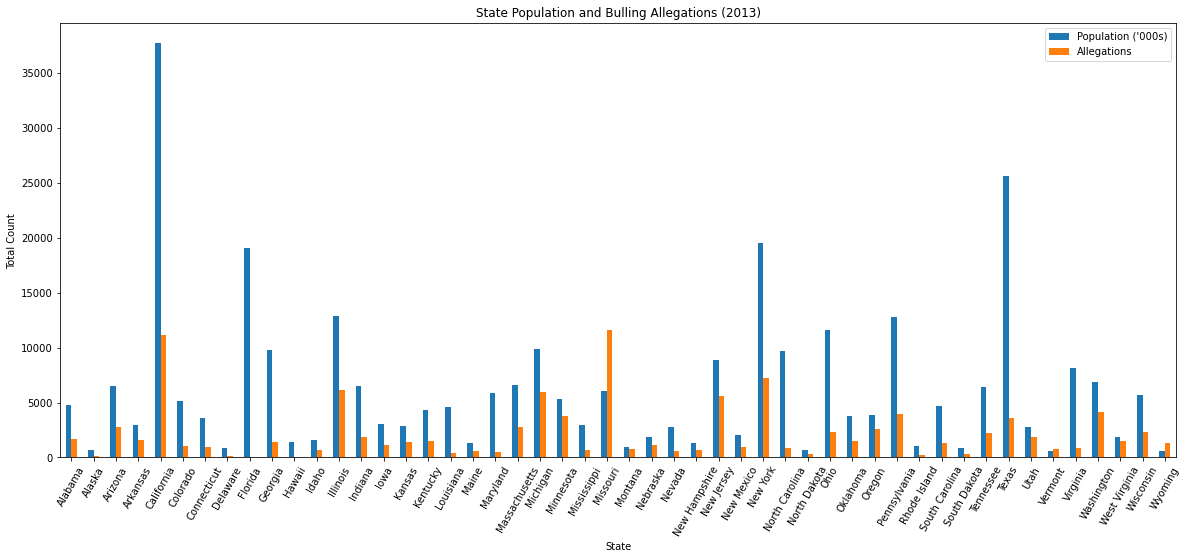

In [9]:
# Plot population and bullying allegations by state to see if cases numbers align with population

states = bully_demo_df["State"].tolist()
population = bully_demo_df["Population"]/1000
allegations = bully_demo_df["Total_Allegations"]

x_axis = np.arange(50)
tick_locations = [value for value in x_axis]

population_df = pd.DataFrame({"Population ('000s)":population, "Allegations": allegations})
population_df.plot(kind="bar",rot=60,figsize=(20,8))
plt.xticks(tick_locations,states)
plt.xlabel("State")
plt.ylabel("Total Count")
plt.title("State Population and Bulling Allegations (2013)")
plt.show()

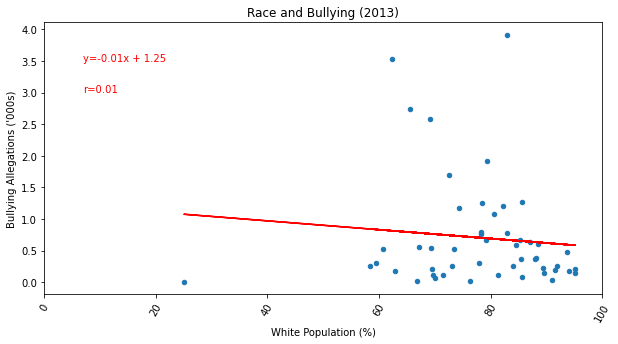

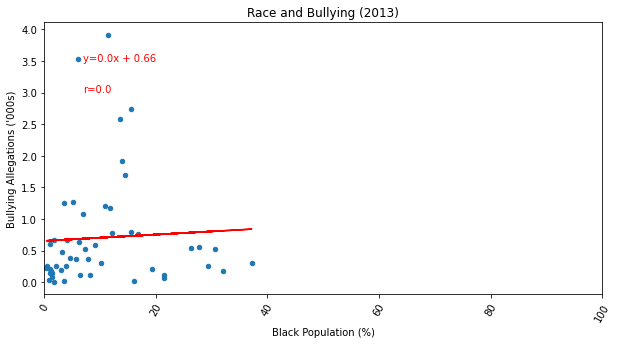

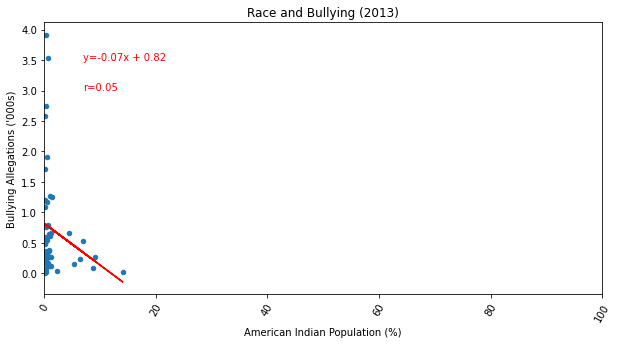

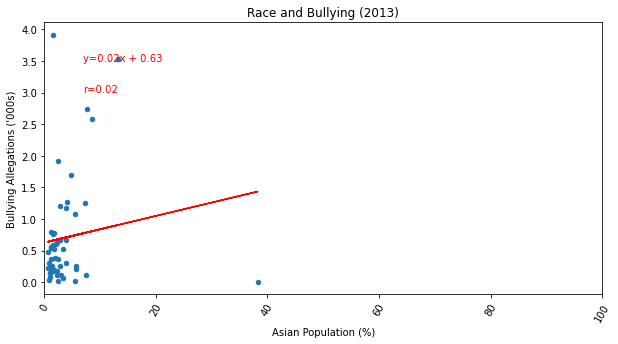

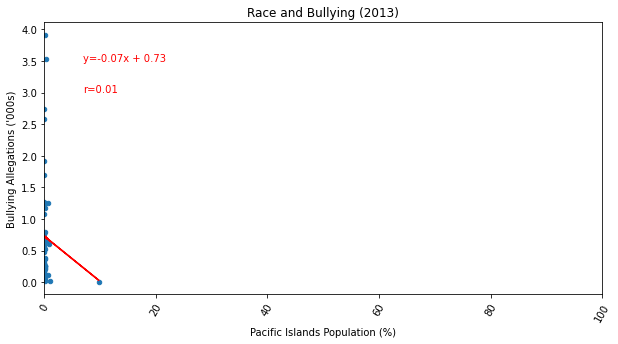

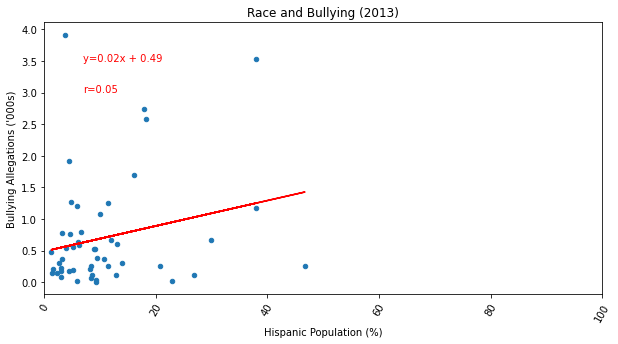

In [10]:
# Plot ethnicities and bullying allegations (due to race) by state to see if racial bullying allegations

w_pop = bully_demo_df["White"]/bully_demo_df["Population"]*100
b_pop = bully_demo_df["Black"]/bully_demo_df["Population"]*100
n_pop = bully_demo_df["American Indian"]/bully_demo_df["Population"]*100
a_pop = bully_demo_df["Asian"]/bully_demo_df["Population"]*100
pi_pop = bully_demo_df["Pacific Islands"]/bully_demo_df["Population"]*100
h_pop = bully_demo_df["Hispanic"]/bully_demo_df["Population"]*100
allegations = bully_demo_df["Alleged_Racial_Harassment"]/1000

ethnicity_df_list = [w_pop,b_pop,n_pop,a_pop,pi_pop,h_pop]
ethnicity_list = ["White","Black","American Indian","Asian","Pacific Islands","Hispanic"]

count=0

for ethnicity in ethnicity_df_list:
    ethnicity_df = pd.DataFrame({"Ethnicity":ethnicity, "Allegations": allegations})

    ethnicity_df.plot(kind="scatter",x="Ethnicity",y="Allegations", rot=60,figsize=(10,5),xlim=(0,100))
    plt.xlabel(f"{ethnicity_list[count]} Population (%)")
    plt.ylabel("Bullying Allegations ('000s)")
    plt.title("Race and Bullying (2013)")
    
    (slope, intercept, r, p, sem) = linregress(ethnicity_df["Ethnicity"], ethnicity_df["Allegations"])
    fit = slope * ethnicity_df["Ethnicity"] + intercept
    line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
    r_value = f"r={round(r**2,2)}"
    plt.plot(ethnicity_df["Ethnicity"],fit,"-r")
    plt.annotate(line_eq, (7,3.5),color="red")
    plt.annotate(r_value, (7,3), color="red")
    
    count=count+1

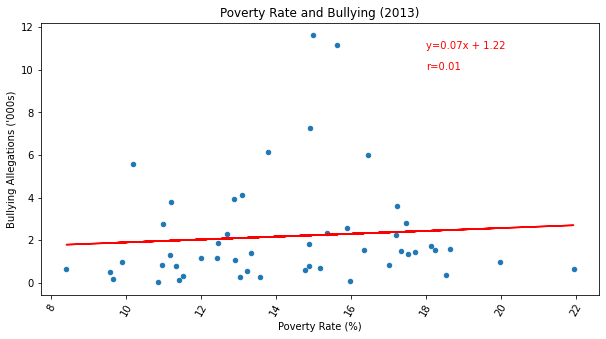

In [11]:
# Plot poverty rate and bullying allegations by state to see if poverty rate affects bullying allegations


poverty = bully_demo_df["Poverty Rate"]
allegations = bully_demo_df["Total_Allegations"]/1000


population_df = pd.DataFrame({"Poverty Rate":poverty, "Allegations": allegations})
population_df.plot(kind="scatter",x="Poverty Rate",y="Allegations", rot=60,figsize=(10,5))

(slope, intercept, r, p, sem) = linregress(population_df["Poverty Rate"], population_df["Allegations"])
fit = slope * population_df["Poverty Rate"] + intercept
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
r_value = f"r={round(r**2,2)}"
plt.plot(population_df["Poverty Rate"],fit,"-r")
plt.annotate(line_eq, (18,11),color="red")
plt.annotate(r_value, (18,10), color="red")

plt.xlabel("Poverty Rate (%)")
plt.ylabel("Bullying Allegations ('000s)")
plt.title("Poverty Rate and Bullying (2013)")

plt.show()

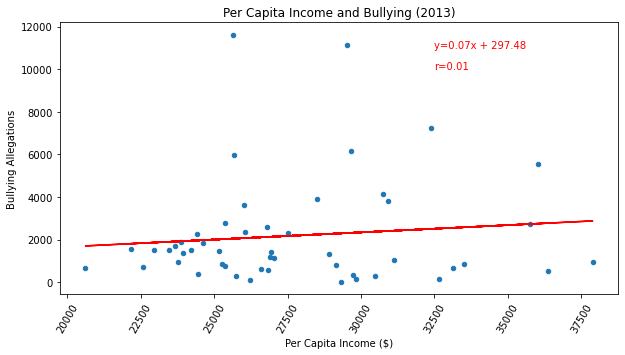

In [12]:
# Plot per capita income and bullying allegations by state to see if poverty rate affects bullying allegations


income = bully_demo_df["Per Capita Income"]
allegations = bully_demo_df["Total_Allegations"]


population_df = pd.DataFrame({"Per Capita Income":income, "Allegations": allegations})
population_df.plot(kind="scatter",x="Per Capita Income",y="Allegations", rot=60,figsize=(10,5))

(slope, intercept, r, p, sem) = linregress(population_df["Per Capita Income"], population_df["Allegations"])
fit = slope * population_df["Per Capita Income"] + intercept
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
r_value = f"r={round(r**2,2)}"
plt.plot(population_df["Per Capita Income"],fit,"-r")
plt.annotate(line_eq, (32500,11000),color="red")
plt.annotate(r_value, (32500,10000), color="red")


plt.xlabel("Per Capita Income ($)")
plt.ylabel("Bullying Allegations")
plt.title("Per Capita Income and Bullying (2013)")

plt.show()

In [13]:
allegations_by_state = allegations_by_state.reset_index()

In [15]:
# Import latitude & longitude of states and merge with bullying data

states_df = pd.read_csv("../Input/state_locs.csv")
states_df = states_df.rename(columns={"name":"State"})
states_df = states_df.drop(columns=["state"])
states_bully_df = pd.merge(states_df, bully_df, on="State")
states_bully_df.head()

,latitude,longitude,State,Alleged_Sexual_Harassment,Alleged_Racial_Harassment,Alleged_Disability_Harassment,Alleged_Orientation_Harassment,Alleged_Religion_Harassment,Total_Allegations
0,63.588753,-154.493062,Alaska,0,0,0,0,0,0
1,63.588753,-154.493062,Alaska,1,0,0,0,0,1
2,63.588753,-154.493062,Alaska,0,0,0,0,0,0
3,63.588753,-154.493062,Alaska,0,0,0,0,0,0
4,63.588753,-154.493062,Alaska,0,0,0,0,0,0


In [16]:
# Create heat map of bullying allegations across the US

fig = gmaps.figure()
locations = states_bully_df[["latitude","longitude"]]
bullying = states_bully_df["Total_Allegations"].astype(float)

heat_layer = gmaps.heatmap_layer(locations,weights=bullying,dissipating=False,max_intensity=bullying.max(),
                                point_radius=3)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [130]:
# Capitalize state names to match values in education data

capital_states = []

for index,row in allegations_by_state.iterrows():
    capital_state = row["State"].upper()
    capital_states.append(capital_state)
    

In [131]:
allegations_by_state["State"] = capital_states
allegations_by_state.head()

,State,Alleged_Sexual_Harassment,Alleged_Racial_Harassment,Alleged_Disability_Harassment,Alleged_Orientation_Harassment,Alleged_Religion_Harassment,Total_Allegations
0,ALABAMA,1040,547,117,0,0,1704
1,ALASKA,124,22,8,0,0,154
2,ARIZONA,1947,662,177,0,0,2786
3,ARKANSAS,611,791,168,0,0,1570
4,CALIFORNIA,6367,3528,1249,0,0,11144


In [132]:
# Merge bullying data with education data

bully_ed_df = pd.merge(allegations_by_state,math_df, on="State")
bully_ed_df.head()

,State,Alleged_Sexual_Harassment,Alleged_Racial_Harassment,Alleged_Disability_Harassment,Alleged_Orientation_Harassment,Alleged_Religion_Harassment,Total_Allegations,School Year,Description,Value,Number of Test Takers,Academic Subject,Category,Age/Grade,Grade Level,LEP Status,English Proficiency,Language,Progress Level
0,ALABAMA,1040,547,117,0,0,1704,2013-2014,Performance on Statewide Mathematics Assessment,LT50,29.0,Mathematics,Two or more races,NaN,Grade 4,NaN,NaN,NaN,NaN
1,ALABAMA,1040,547,117,0,0,1704,2013-2014,Performance on Statewide Mathematics Assessment,LT50,11.0,Mathematics,English Learner,NaN,Grade 5,NaN,NaN,NaN,NaN
2,ALABAMA,1040,547,117,0,0,1704,2013-2014,Performance on Statewide Mathematics Assessment,LT50,223.0,Mathematics,Male,NaN,Grade 5,NaN,NaN,NaN,NaN
3,ALABAMA,1040,547,117,0,0,1704,2013-2014,Performance on Statewide Mathematics Assessment,LT50,15.0,Mathematics,Two or more races,NaN,Grade 5,NaN,NaN,NaN,NaN
4,ALABAMA,1040,547,117,0,0,1704,2013-2014,Performance on Statewide Mathematics Assessment,LT50,10.0,Mathematics,English Learner,NaN,Grade 6,NaN,NaN,NaN,NaN


In [133]:
# Create combined DataFrame with all state assessment scores by state

frames = [math_df,reading_df,science_df]

tests_df = pd.concat(frames)
tests_df.head()

,School Year,State,Description,Value,Number of Test Takers,Academic Subject,Category,Age/Grade,Grade Level,LEP Status,English Proficiency,Language,Progress Level
115,2013-2014,ALABAMA,Performance on Statewide Mathematics Assessment,LT50,29.0,Mathematics,Two or more races,NaN,Grade 4,NaN,NaN,NaN,NaN
116,2013-2014,ALABAMA,Performance on Statewide Mathematics Assessment,LT50,11.0,Mathematics,English Learner,NaN,Grade 5,NaN,NaN,NaN,NaN
117,2013-2014,ALABAMA,Performance on Statewide Mathematics Assessment,LT50,223.0,Mathematics,Male,NaN,Grade 5,NaN,NaN,NaN,NaN
118,2013-2014,ALABAMA,Performance on Statewide Mathematics Assessment,LT50,15.0,Mathematics,Two or more races,NaN,Grade 5,NaN,NaN,NaN,NaN
119,2013-2014,ALABAMA,Performance on Statewide Mathematics Assessment,LT50,10.0,Mathematics,English Learner,NaN,Grade 6,NaN,NaN,NaN,NaN


In [134]:
# Find scores greater than or equal to 50%

ge50_counts = []

for state in us.states.STATES:
    upper_state = str(state).upper()
    ge50 = tests_df.loc[(tests_df["Value"]=="GE50") & (tests_df["State"]==upper_state)]
    ge50_count = ge50["Value"].count()
    ge50_counts.append(ge50_count)

Text(8000, 50000, 'r=0.19')

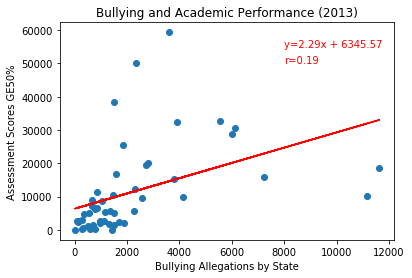

In [140]:
# Plot scores GE50 vs. Bulling Allegations

y_axis = ge50_counts
x_axis = allegations_by_state["Total_Allegations"]

plt.scatter(x_axis,y_axis)
plt.xlabel("Bullying Allegations by State")
plt.ylabel("Assessment Scores GE50%")
plt.title("Bullying and Academic Performance (2013)")

(slope, intercept, r, p, sem) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
r_value = f"r={round(r**2,2)}"
plt.plot(x_axis,fit,"-r")
plt.annotate(line_eq, (8000,55000),color="red")
plt.annotate(r_value, (8000,50000), color="red")

In [141]:
# Find scores less than 50%

lt50_counts = []

for state in us.states.STATES:
    upper_state = str(state).upper()
    lt50 = tests_df.loc[(tests_df["Value"]=="LT50") & (tests_df["State"]==upper_state)]
    lt50_count = lt50["Value"].count()
    lt50_counts.append(lt50_count)

Text(8000, 30000, 'r=0.35')

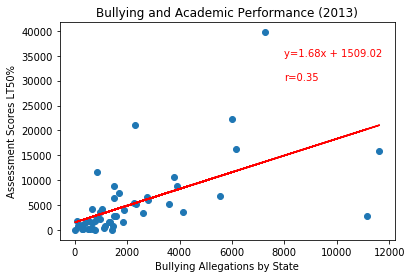

In [143]:
# Plot scores LT50 vs. Bulling Allegations

y_axis = lt50_counts
x_axis = allegations_by_state["Total_Allegations"]

plt.scatter(x_axis,y_axis)
plt.xlabel("Bullying Allegations by State")
plt.ylabel("Assessment Scores LT50%")
plt.title("Bullying and Academic Performance (2013)")

(slope, intercept, r, p, sem) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
r_value = f"r={round(r**2,2)}"
plt.plot(x_axis,fit,"-r")
plt.annotate(line_eq, (8000,35000),color="red")
plt.annotate(r_value, (8000,30000), color="red")

In [21]:
# Find graduation rates greater than or equal to 50%

ge50_counts = []

for state in us.states.STATES:
    upper_state = str(state).upper()
    ge50 = grad_df.loc[(grad_df["Value"]=="GE50") & (grad_df["State"]==upper_state)]
    ge50_count = ge50["Value"].count()
    ge50_counts.append(ge50_count)

Text(8000, 3250, 'r=0.44')

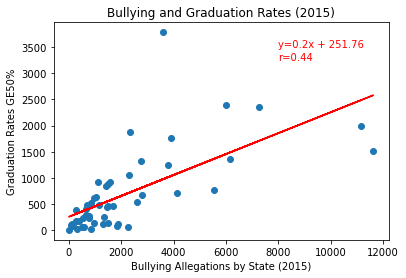

In [25]:
# Plot graduation rates GE50 vs. Bulling Allegations

y_axis = ge50_counts
x_axis = allegations_by_state["Total_Allegations"]

plt.scatter(x_axis,y_axis)
plt.xlabel("Bullying Allegations by State")
plt.ylabel("Graduation Rates GE50%")
plt.title("Bullying and Graduation Rates (2013)")

(slope, intercept, r, p, sem) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
r_value = f"r={round(r**2,2)}"
plt.plot(x_axis,fit,"-r")
plt.annotate(line_eq, (8000,3500),color="red")
plt.annotate(r_value, (8000,3250), color="red")

In [26]:
# Find graduation rates less than 50%

lt50_counts = []

for state in us.states.STATES:
    upper_state = str(state).upper()
    lt50 = grad_df.loc[(grad_df["Value"]=="LT50") & (grad_df["State"]==upper_state)]
    lt50_count = lt50["Value"].count()
    lt50_counts.append(lt50_count)

Text(8000, 400, 'r=0.14')

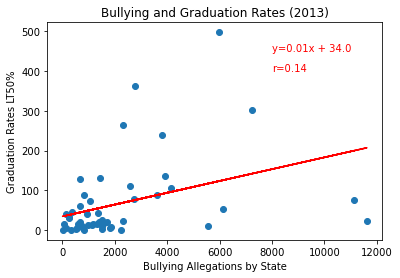

In [29]:
# Plot graduation rates LT50 vs. Bulling Allegations

y_axis = lt50_counts
x_axis = allegations_by_state["Total_Allegations"]

plt.scatter(x_axis,y_axis)
plt.xlabel("Bullying Allegations by State")
plt.ylabel("Graduation Rates LT50%")
plt.title("Bullying and Graduation Rates (2013)")

(slope, intercept, r, p, sem) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
r_value = f"r={round(r**2,2)}"
plt.plot(x_axis,fit,"-r")
plt.annotate(line_eq, (8000,450),color="red")
plt.annotate(r_value, (8000,400), color="red")